In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#from seaborn import color_palette
#colors = color_palette()

In [3]:
colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

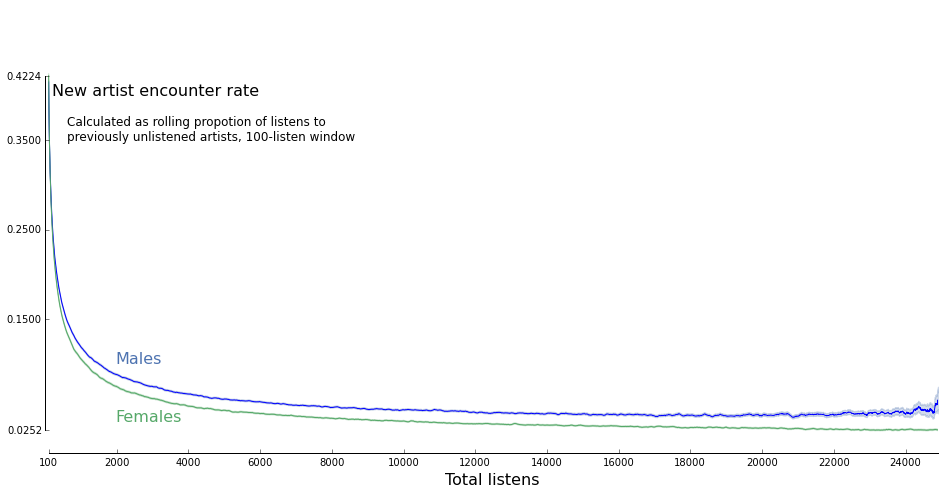

In [65]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
npz = np.load('../staging/m_results2.npz')
m_mean = npz['mean']
m_std = npz['std']
m_n = npz['n']
m_ci = 1.96 * (m_std/np.sqrt(m_n))
ax.plot(range(100,50100),m_mean,lw=1)
ax.fill_between(range(100,50100),m_mean-m_ci,m_mean+m_ci,alpha=0.25,color=colors[0])
ax.annotate('Males',xy=(2000,0.1),color = colors[0],fontsize=16)

mx = 25000-100

npz = np.load('../staging/f_results2.npz')
f_mean = npz['mean']
f_std = npz['std']
f_n = npz['n']
f_ci = 1.96 * (f_std/np.sqrt(f_n))
ax.plot(range(100,50100),f_mean,lw=1,c=colors[1])
ax.fill_between(range(100,50100),f_mean-f_ci,f_mean+f_ci,alpha=0.25,color=colors[1])
ax.annotate('Females',xy=(2000,0.035),color = colors[1],fontsize=16)

ax.set_ylim(0,.5)
ax.set_xlim(0,mx)
ax.set_axis_bgcolor('white')
ax.set_xticks([100]+list(np.arange(2000,mx+1,2000)))
ax.spines['bottom'].set_bounds(100,mx)

ax.set_yticks([min(m_mean[:mx].min(),f_mean[:mx].min())]+list(np.arange(.15,.4,.1))+[max(m_mean[:mx].max(),f_mean[:mx].max())])
ax.spines['left'].set_bounds(min(m_mean[:mx].min(),f_mean[:mx].min()),max(m_mean[:mx].max(),f_mean[:mx].max()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.annotate("New artist encounter rate",xy=(200,0.4),fontsize=16) #\n(rolling proportion of never-\nbefore-listened artists, 100-\nlisten window)
ax.annotate("Calculated as rolling propotion of listens to\npreviously unlistened artists, 100-listen window",xy=(600,0.35),fontsize=12) #\n(rolling proportion of never-\nbefore-listened artists, 100-\nlisten window)
ax.set_xlabel('Total listens',fontsize=16)


In [33]:
m_mean[:24000-100]

array([ 0.41543209,  0.4084113 ,  0.40431872, ...,  0.04382288,
        0.04384331,  0.04381375])

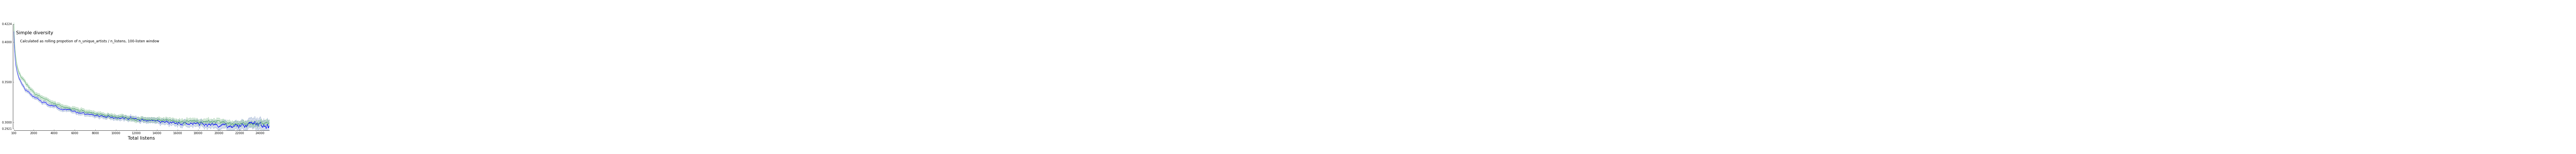

In [70]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
npz = np.load('../staging/m_results_diversity.npz')
m_mean = npz['mean']
m_std = npz['std']
m_n = npz['n']
m_ci = 1.96 * (m_std/np.sqrt(m_n))
ax.plot(range(100,50100),m_mean,lw=1)
ax.fill_between(range(100,50100),m_mean-m_ci,m_mean+m_ci,alpha=0.25,color=colors[0])
ax.annotate('Males',xy=(9000,0.075),color = colors[0],fontsize=16)

mx = 25000-100

npz = np.load('../staging/f_results_diversity.npz')
f_mean = npz['mean']
f_std = npz['std']
f_n = npz['n']
f_ci = 1.96 * (f_std/np.sqrt(f_n))
ax.plot(range(100,50100),f_mean,lw=1,c=colors[1])
ax.fill_between(range(100,50100),f_mean-f_ci,f_mean+f_ci,alpha=0.25,color=colors[1])
ax.annotate('Females',xy=(9000,0.02),color = colors[1],fontsize=16)

ax.set_ylim(0.29,.45)
ax.set_xlim(0,mx)
ax.set_axis_bgcolor('white')
ax.set_xticks([100]+list(np.arange(2000,mx+1,2000)))
ax.spines['bottom'].set_bounds(100,mx)

ax.set_yticks([min(m_mean[:mx].min(),f_mean[:mx].min())]+list(np.arange(.3,.4,.05))+[max(m_mean[:mx].max(),f_mean[:mx].max())]) # 
ax.spines['left'].set_bounds(min(m_mean[:mx].min(),f_mean[:mx].min()),max(m_mean[:mx].max(),f_mean[:mx].max()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.annotate("Simple diversity",xy=(300,0.41),fontsize=16) #\n(rolling proportion of never-\nbefore-listened artists, 100-\nlisten window)
ax.annotate("Calculated as rolling propotion of n_unique_artists / n_listens, 100-listen window",xy=(700,0.4),fontsize=12) #\n(rolling proportion of never-\nbefore-listened artists, 100-\nlisten window)
ax.set_xlabel('Total listens',fontsize=16)
